In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import Tensor

from torchvision import transforms
import torchvision.transforms.functional as fn
from PIL import Image

In [6]:
def image_to_tensor(image, reshape_dims=(224, 224)):
    transform_pipe = transforms.Compose([
        transforms.Resize(reshape_dims),
        transforms.CenterCrop((224,224)),
        transforms.ToTensor(),
        transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )])
    img_tensor = transform_pipe(image)
    return torch.unsqueeze(img_tensor, 0)


tensor([[[0.2941, 0.3020, 0.3137,  ..., 0.0392, 0.0510, 0.0549],
         [0.2902, 0.3059, 0.2980,  ..., 0.0471, 0.0510, 0.0549],
         [0.2980, 0.3098, 0.2784,  ..., 0.0863, 0.1020, 0.0902],
         ...,
         [0.4157, 0.4118, 0.3961,  ..., 0.4980, 0.5333, 0.6392],
         [0.4706, 0.4745, 0.4157,  ..., 0.5137, 0.6078, 0.5765],
         [0.4667, 0.4745, 0.4784,  ..., 0.5686, 0.5451, 0.6549]],

        [[0.2118, 0.2275, 0.2392,  ..., 0.0471, 0.0471, 0.0510],
         [0.2275, 0.2431, 0.2431,  ..., 0.0549, 0.0549, 0.0510],
         [0.2706, 0.2863, 0.2471,  ..., 0.0941, 0.1020, 0.0902],
         ...,
         [0.3882, 0.3843, 0.3725,  ..., 0.4627, 0.4980, 0.6039],
         [0.4431, 0.4471, 0.3922,  ..., 0.4902, 0.5843, 0.5529],
         [0.4392, 0.4471, 0.4549,  ..., 0.5490, 0.5216, 0.6314]],

        [[0.2314, 0.2431, 0.2471,  ..., 0.0275, 0.0314, 0.0353],
         [0.2275, 0.2431, 0.2392,  ..., 0.0353, 0.0353, 0.0353],
         [0.2314, 0.2392, 0.2039,  ..., 0.0745, 0.0941, 0.

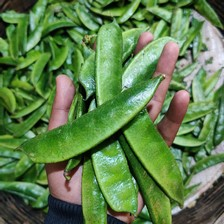

In [13]:
img = Image.open("data/Vegetable Images/test/Bean/0001.jpg")
#img_tensor = image_to_tensor(img)
img_tensor = fn.to_tensor(img)
print(img_tensor)
img


In [22]:
print(f"Mean: {img_tensor.mean()}\nStd: {img_tensor.std()}")
img_tensor_norm = fn.normalize(img_tensor, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
print(f"Mean: {img_tensor_norm.mean()}\nStd: {img_tensor_norm.std()}")


Mean: 0.39029744267463684
Std: 0.22613532841205597
Mean: -0.25768551230430603
Std: 0.9855890274047852


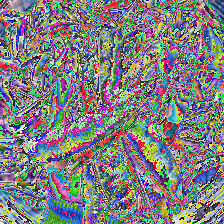

In [23]:
back_from_tensor = fn.to_pil_image(img_tensor_norm)
back_from_tensor